In [1]:
%matplotlib inline  
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
!pip install ipyfilechooser
!pip install --upgrade mplfinance

# Start here to retrieve fresh data from IEX
Ticker symbols should be inserted in the line ```symbols = ['GM', 'TSLA']```

When the retrieval has run, the data is saved in a pickle file.

If you have a free IEX

In [4]:
from pandas_datareader.iex.daily import IEXDailyReader
import pandas as pd
import datetime as dt
# IEX_token='sk_50446876d4364cc8b218b298207a8e8f'
# IEX_token='pk_73ddcbe824df41449a42bb6ea4cd1855'
IEX_token='pk_09a5233e4a9344e1ac550b0b455a4550'
# symbols = ['GM', 'TSLA','AAPL', 'GOOG', 'MSFT','ZNGA', 'VIXY', 'SPY']
symbols = ['GM', 'TSLA']
start = dt.datetime(2017, 5, 4)
# end = dt.datetime(2020, 3, 31) #end defaults to most recent available.
# get OHLCV from iex (no more yahoo or google stock prices anymore)
# Idiosyncrasy of DataReader is that the top level of column labels is OHLCV, and second level is TICKER
dr=IEXDailyReader(symbols,start=start, api_key=IEX_token)
d=dr.read()
# Now swap the column label levels permanently
d.columns = d.columns.swaplevel(0, 1)
d.sort_index(1, inplace=True)
#d.to_csv('iex_{}_{}.csv'.format(*symbols))
d.to_pickle('iex_{}_{}.pkl'.format(*symbols))

RemoteDataError: ignored

# Start with saved data
Because of the quota limits of IEX, it may be advantageous to load directly from a file. Choose a file with the extension '.pkl'.

In [7]:
from ipyfilechooser import FileChooser

fc = FileChooser()

display(fc)

FileChooser(path='/content', filename='', show_hidden='False')

In [0]:
import pandas as pd
d=pd.read_pickle(fc.selected)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates, ticker
import mplfinance as mpf
#from mplfinance.mplfinance import candlestick_ohlc 

In [0]:
d.columns.set_levels(['Close', 'High', 'Low', 'Open', 'Volume'], level=1, inplace=True)

In [0]:
d.index = pd.to_datetime(d.index)

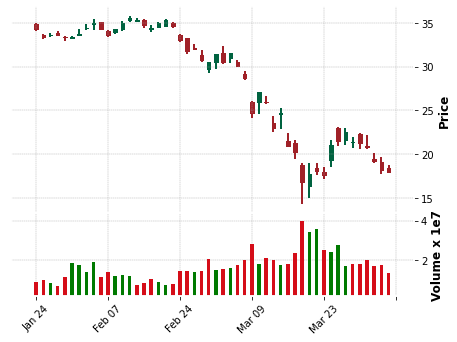

In [15]:
mpf.plot(d['GM'][-50:],type = 'candlestick', style='charles', volume = True)

In [0]:
# Calculate daily log returns
rets=log(d/d.shift(1))
#rets

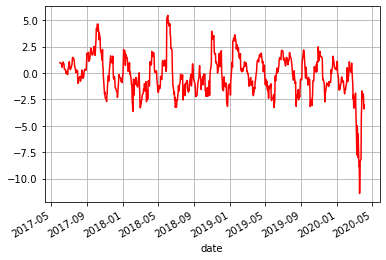

In [18]:
(d['GM']['Close']-d['GM']['Close'].rolling(window=20).mean()).plot(grid=True, style=['red'])

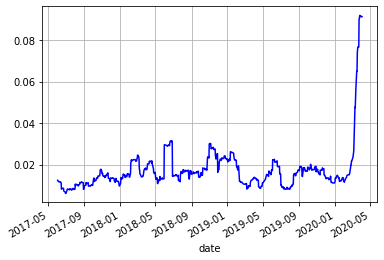

In [20]:
# Calculate rolling/moving standard deviation over a window and plot
rets['GM']['Close'].rolling(window=20).std().plot(grid=True, style=['blue'])

In [0]:
#d.drop(labels='volume',axis=1,level=1,inplace=True)

In [0]:
d['GM'].index

In [0]:
d.index

In [0]:
# OMG this was painful ... but instructive. I wanted to get 
# d=d.drop(labels=['volume'],axis=1, level=1)
# d = d.drop('index', 1)
k=d.index.tolist()
# l=d['GM'].apply(tuple, axis=1).tolist()
# Below reset_index causes index (timestamps as strings) to become ordinary column
f=d['GM'].reset_index()
# This applies(in map-style) function to convert time string in (new)'date' column
f['date'] = f['date'].apply(lambda x : dt.datetime.strptime(x, "%Y-%m-%d").toordinal())
# f.apply(tuple, axis=1).tolist()
# filt=d.iloc[:, 0:4]
# f=filt.reset_index(inplace=True)
type(f.iloc[1,0])
f

In [0]:
f.date

In [0]:
f.index
f['Timestamp']=f['date']
f = f.set_index(['Timestamp'])
f.index = pd.to_datetime(f.index)
f.resample('M')
f

In [0]:
import datetime as dt
t=dt.datetime.strptime("30Nov00", "%d%b%y")
now=dt.datetime.now()
now.toordinal()


In [0]:
# candlestick2_ohlc takes individual parameters for O, H, L C lists
from mpl_finance import candlestick_ohlc
fig, ax1 = plt.subplots()
# fin.candlestick2_ohlc(ax1, d['open']['GM'], d['high']['GM'], d['low']['GM'], d['close']['GM'], width=4, colorup='g', colordown='r', alpha=0.75)
# fin.candlestick2_ohlc(ax1, d['open'], d['high'], d['low'], d['close'], width=4, colorup='g', colordown='r', alpha=0.75)
d
# nd=d['GM'].values
# print(nd.shape)
candlestick_ohlc(ax1, f.values)
plt.show()
f
#
# 
# fin.candlestick2_ohlc(ax1,d['GM'].values)

In [0]:
d.index

In [0]:
# candlestick2_ohlc takes individual parameters for O, H, L C lists
import io
import datetime as dt
from pandas_datareader.iex.daily import IEXDailyReader
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
from matplotlib.dates import date2num, DayLocator, MonthLocator, DateFormatter
import pandas as pd

symbols = ['GM', 'IBM', 'TSLA','AAPL', 'GOOG', 'MSFT','ZNGA', 'VIXY']
start = dt.datetime(2017, 9, 10)
end = dt.datetime(2018, 8, 25)
dr=IEXDailyReader(symbols,start=start,end=end, api_key=IEX_token)
d=dr.read()

# Now swap the column label levels permanently
d.columns = d.columns.swaplevel(0, 1)
d.sort_index(1, inplace=True)

dd=d['GM'].reset_index()
dd['date'] = date2num(pd.to_datetime(dd['date']).tolist())

plt.rcParams['figure.figsize'] = [15, 9]
fig, ax=plt.subplots()
candlestick_ohlc(ax, dd.values,colorup='green', colordown='red')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%d-%b-%y'))
plt.xticks(rotation=45)
plt.show()

In [0]:
# Now try to re-sample (down-sample) from daily to monthly, and to synthesise OHLC
d.index = pd.to_datetime(d.index)
dw=d['GM']
# Create new df for resample - 'M' Monthly but also intra-day, quarterly, weekly etc.
dx=pd.DataFrame()
dx['Open']=dw['open'].resample('M').first()
dx['High']=dw['high'].resample('M').max()
dx['Low'] =dw['low'].resample('M').min()
dx['Close']=dw['close'].resample('M').last()

# print(dx)
dx=dx.reset_index()
dx['date'] = date2num(pd.to_datetime(dx['date']).tolist())

plt.rcParams['figure.figsize'] = [15, 9]
fig, ax=plt.subplots()
candlestick_ohlc(ax, dx.values,width=4,colorup='green', colordown='red')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%d%b%y'))
plt.xticks(rotation=45)
plt.show()

In [0]:
dx.first()

In [0]:
d['GM']['close'].max()

In [0]:
d[where d['']]